Travelling salesman problem
Aluna: Ana Clara Kuster Schultz

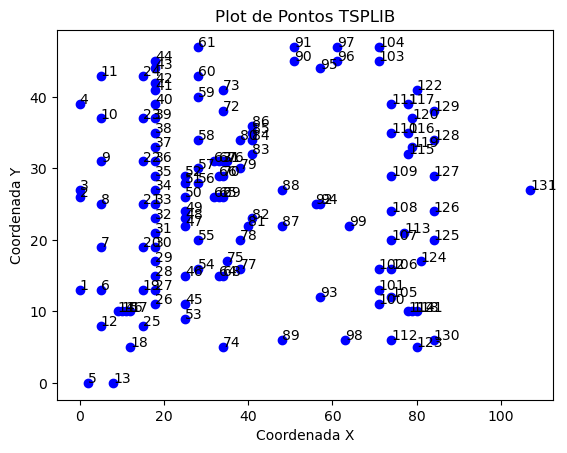

In [1]:
import matplotlib.pyplot as plt

# Função para ler o arquivo TSPLIB e extrair os pontos
def ler_arquivo_tsplib(nome_arquivo):
    pontos = []
    with open(nome_arquivo, "r") as arquivo:
        lendo_pontos = False
        for linha in arquivo:
            if "NODE_COORD_SECTION" in linha:
                lendo_pontos = True
                continue
            elif "EOF" in linha:
                break
            if lendo_pontos:
                partes = linha.strip().split()
                if len(partes) == 3:
                    _, x, y = partes
                    pontos.append((float(x), float(y)))
    return pontos

# Nome do arquivo TSPLIB
nome_arquivo = "arq1.tsp"

# Ler os pontos do arquivo
pontos = ler_arquivo_tsplib(nome_arquivo)

# Extrair as coordenadas x e y dos pontos
x = [ponto[0] for ponto in pontos]
y = [ponto[1] for ponto in pontos]

# Criar o gráfico de dispersão
plt.scatter(x, y, marker='o', color='blue')

# Definir rótulos para os pontos 
for i, ponto in enumerate(pontos):
    plt.annotate(str(i + 1), (x[i], y[i]))

# Definir título e rótulos dos eixos 
plt.title('Plot de Pontos TSPLIB')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Mostrar o gráfico
plt.show()

Algumas definições sobre Algoritmos Genéticos:

INICIALIZAÇÃO: criação da primeira população de soluções candidatas para um problema. Isso pode ser feito de várias maneiras, incluindo a geração aleatória de soluções, o uso de heurísticas, dados históricos ou soluções especiais. A qualidade da inicialização afeta o desempenho do algoritmo, pois define o ponto de partida para a busca de soluções melhores ao longo das gerações.

CÁLCULO DA FITNESS: avaliação da qualidade de uma solução candidata em relação ao problema em questão. É feito através de uma função de aptidão que atribui um valor numérico à solução, refletindo o quão boa ela é em relação ao objetivo de otimização. Essa avaliação orienta a seleção e evolução das soluções ao longo das gerações do algoritmo genético, buscando encontrar soluções cada vez melhores.

SELEÇÃO: processo de escolher indivíduos de uma população para reprodução, visando criar a próxima geração. Indivíduos mais aptos, de acordo com a função de aptidão, têm maior probabilidade de serem selecionados. Existem várias estratégias de seleção, incluindo roleta viciada, torneio, classificação e elitismo, que influenciam como os melhores indivíduos são escolhidos para melhorar as soluções ao longo das gerações.

In [ ]:
#INICIALIZAÇÃO

import random

def ler_arquivo_tsp(nome_arquivo):
    cidades = []
    with open(nome_arquivo, 'r') as arquivo:
        lendo_coord = False
        for linha in arquivo:
            linha = linha.strip()
            if linha.startswith("NODE_COORD_SECTION"):
                lendo_coord = True
            elif linha.startswith("EOF"):
                break
            elif lendo_coord:
                partes = linha.split()
                cidade_id = int(partes[0])
                x = float(partes[1])
                y = float(partes[2])
                cidades.append((cidade_id, x, y))
    return cidades

def criar_populacao_inicial(cidades, tamanho_populacao):
    # Crie indivíduos como permutações aleatórias das cidades
    populacao = []
    cidades_sem_origem = cidades[1:]  # Exclua a cidade de origem
    for _ in range(tamanho_populacao):
        cromossomo = random.sample(cidades_sem_origem, len(cidades_sem_origem))
        cromossomo.insert(0, cidades[0])  # Adicione a cidade de origem no início
        populacao.append(cromossomo)
    return populacao

# Substitua "exemplo.tsp" pelo nome do seu arquivo .tsp
nome_do_arquivo_tsp = "arq1.tsp"

# Leitura das coordenadas das cidades do arquivo .tsp
cidades = ler_arquivo_tsp(nome_do_arquivo_tsp)

# Inicialização da população
tamanho_populacao = 50  # Tamanho da população inicial
populacao_inicial = criar_populacao_inicial(cidades, tamanho_populacao)
print (populacao_inicial)

# Agora, a variável "populacao_inicial" contém a população inicial de cromossomos

# OUTPUT NÃO MOSTRADO JÁ QUE É UMA LISTA DE NÚMEROS MUITO EXTENSA

In [4]:
#CÁLCULO DA FITNESS

# Define distâncias entre as cidades
def calcular_distancia_total(rota):
    distancia_total = 0.0
    for i in range(len(rota) - 1):
        cidade_atual = rota[i]
        proxima_cidade = rota[i + 1]
        distancia = calcular_distancia_entre_cidades(cidade_atual, proxima_cidade)
        distancia_total += distancia
    # Adiciona a distância de volta à cidade de origem
    distancia_total += calcular_distancia_entre_cidades(rota[-1], rota[0])
    return distancia_total

def calcular_distancia_entre_cidades(cidade1, cidade2):
    x1, y1 = cidade1[1], cidade1[2]
    x2, y2 = cidade2[1], cidade2[2]
    # Usa a fórmula da distância euclidiana para calcular a distância entre duas cidades
    distancia = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
    return distancia

# Função para calcular a aptidão de um cromossomo (rota)
def calcular_aptidao(cromossomo):
    distancia_total = calcular_distancia_total(cromossomo)
    return distancia_total

# Uso da aptidão
for cromossomo in populacao_inicial:
    aptidao = calcular_aptidao(cromossomo)
    print("Aptidao da rota: {:.2f}".format(aptidao))

Aptidao da rota: 4634.13
Aptidao da rota: 4876.57
Aptidao da rota: 4725.54
Aptidao da rota: 4998.89
Aptidao da rota: 4557.99
Aptidao da rota: 4185.90
Aptidao da rota: 4418.66
Aptidao da rota: 4268.45
Aptidao da rota: 4675.17
Aptidao da rota: 4650.47
Aptidao da rota: 4721.76
Aptidao da rota: 4852.95
Aptidao da rota: 4453.13
Aptidao da rota: 4814.13
Aptidao da rota: 4471.84
Aptidao da rota: 4602.44
Aptidao da rota: 4654.77
Aptidao da rota: 4953.91
Aptidao da rota: 5023.91
Aptidao da rota: 4399.75
Aptidao da rota: 4418.70
Aptidao da rota: 4716.76
Aptidao da rota: 4563.49
Aptidao da rota: 4423.72
Aptidao da rota: 4981.67
Aptidao da rota: 4307.04
Aptidao da rota: 4486.46
Aptidao da rota: 4662.94
Aptidao da rota: 4726.71
Aptidao da rota: 4560.20
Aptidao da rota: 4545.29
Aptidao da rota: 4639.66
Aptidao da rota: 4752.56
Aptidao da rota: 4650.65
Aptidao da rota: 4735.83
Aptidao da rota: 4420.68
Aptidao da rota: 4753.99
Aptidao da rota: 4503.82
Aptidao da rota: 4621.76
Aptidao da rota: 4697.47


Melhor distância encontrada: 3674.7018073042


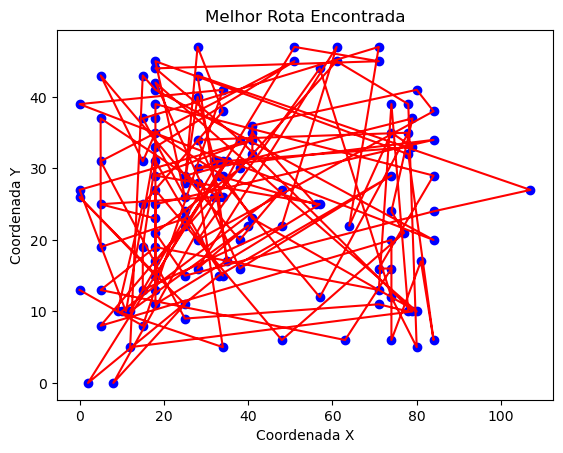

In [15]:
#SELEÇÃO

import random
import matplotlib.pyplot as plt


# Seleciona aleatoriamente elementos da população
def selecao(populacao, k):
    return random.sample(populacao, k)


# Define o cruzamento entre os indivíduos que se mesclarão para formar a nova geração
def cruzamento(pai1, pai2):
    ponto_corte = random.randint(1, len(pai1) - 2)
    filho1 = pai1[:ponto_corte] + [cidade for cidade in pai2 if cidade not in pai1[:ponto_corte]]
    filho2 = pai2[:ponto_corte] + [cidade for cidade in pai1 if cidade not in pai2[:ponto_corte]]
    return filho1, filho2


# Estabelece o controle da probabilidade de ocorrer uma mutação em um cromossomo durante a geração de uma nova população
def mutacao(cromossomo, taxa_mutacao):
    if random.random() < taxa_mutacao:
        i, j = random.sample(range(1, len(cromossomo) - 1), 2)
        cromossomo[i], cromossomo[j] = cromossomo[j], cromossomo[i]


# Define as distâncias entre cidades
def encontrar_melhor_rota(cidades, tamanho_populacao, num_geracoes, taxa_mutacao):
    populacao = criar_populacao_inicial(cidades, tamanho_populacao)
    melhor_rota = None
    melhor_distancia = float('inf')
    distancias = []

# Para cada filho sorteado, a população será evoluída a cada nova geração
    for geracao in range(num_geracoes):
        populacao = selecao(populacao, tamanho_populacao)
        nova_geracao = []

        for i in range(0, tamanho_populacao, 2):
            pai1, pai2 = populacao[i], populacao[i + 1]
            filho1, filho2 = cruzamento(pai1, pai2)
            mutacao(filho1, taxa_mutacao)
            mutacao(filho2, taxa_mutacao)
            nova_geracao.extend([filho1, filho2])

        populacao = nova_geracao

        for cromossomo in populacao:
            distancia = calcular_distancia_total(cromossomo)
            if distancia < melhor_distancia:
                melhor_distancia = distancia
                melhor_rota = cromossomo
            distancias.append(distancia)

    return melhor_rota, distancias

# Configurações 
tamanho_populacao = 1000
num_geracoes = 1000
taxa_mutacao = 0.1


# Encontrar a melhor rota
melhor_rota, distancias = encontrar_melhor_rota(cidades, tamanho_populacao, num_geracoes, taxa_mutacao)

# Calcular a distância da melhor rota
melhor_distancia = calcular_distancia_total(melhor_rota)

# Imprimir o valor da melhor rota
print(f"Melhor distância encontrada: {melhor_distancia}")

# Plotar o gráfico da melhor rota
melhor_x = [cidade[1] for cidade in melhor_rota]
melhor_y = [cidade[2] for cidade in melhor_rota]

plt.scatter(x, y, marker='o', color='blue')
plt.plot(melhor_x, melhor_y, linestyle='-', color='red')
plt.title('Melhor Rota Encontrada')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()
